In [12]:
# Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import itertools
from wordcloud import WordCloud, STOPWORDS

In [4]:
# Get Paths
data_path = os.path.join(os.path.pardir, 'data')
raw_data_path = os.path.join(data_path, 'raw')

In [5]:
# Read Files
def read_data(file_path, file_name, file_ext):
    file = os.path.join(file_path, file_name+'.'+file_ext)
    if file_ext == 'csv':
        return pd.read_csv(file)
    if file_ext == 'json':
        return pd.read_json(file)
df = read_data(raw_data_path, 'train','json')

In [6]:
# Initial EDA
unique_vals = df['cuisine'].unique()
print("Unqiue Cusinies: ", len(unique_vals))
print(unique_vals)

Unqiue Cusinies:  20
['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']


Text(0.5, 1.0, 'Counts of Cuisine Samples in Training Data')

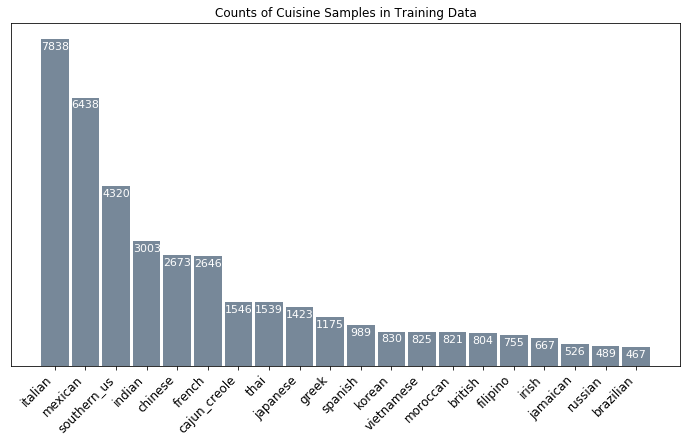

In [7]:
vals = df['cuisine'].value_counts()
#print(type(vals))
plt.figure(figsize = (12, 9), facecolor = None) 
xvals = vals.index.values
yvals = vals.values
bars = plt.bar(xvals, yvals, width=0.9, color='lightslategray')
#for spine in plt.gca().spines.values():
#    spine.set_visible(False)
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    #item.
plt.subplots_adjust(bottom=0.35)
for bar in bars:
    plt.gca().text((bar.get_x()+bar.get_width()/2), bar.get_height()-250,
                   str(int(bar.get_height())), ha='center', color='w', fontsize=11)
plt.gca().axes.get_yaxis().set_ticks([])
xticks = plt.gca().axes.set_xticklabels(xvals,fontsize=12,horizontalalignment='right')
plt.title('Counts of Cuisine Samples in Training Data')

In [102]:
## It seems that we have unbalanced classes of cuisines, we need to eliminate some of the following cuisines:
##[french, chinese, indian, southern_us, mexican, italian]

In [8]:
# Check for null values
df.isnull().values.any()

False

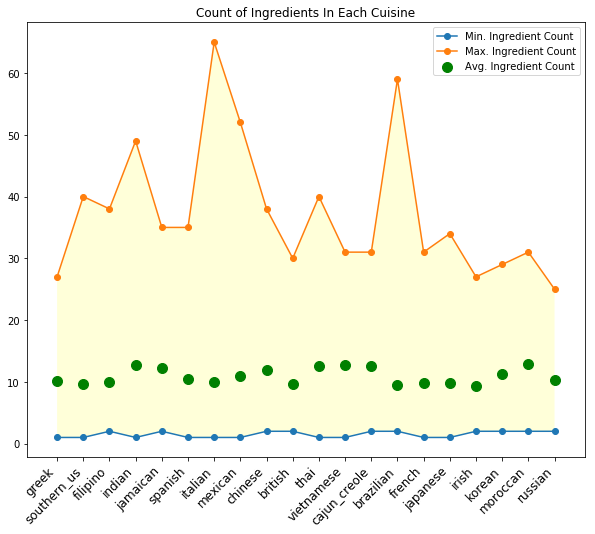

In [39]:
# Explore size of ingredients involved for each cuisine
df['ing_size'] = df['ingredients'].apply(lambda x: len(x))
max_s=[]
min_s=[]
mean_s = []
for cuisine in unique_vals:
    max_s += [df[df['cuisine']==cuisine]['ing_size'].max()]
    min_s += [df[df['cuisine']==cuisine]['ing_size'].min()]
    mean_s += [round(df[df['cuisine']==cuisine]['ing_size'].mean(),2)]
    
plt.figure(figsize = (10, 8), facecolor = None) 

line_plt = plt.plot(min_s, '-o', max_s,'-o')
line_plt[0].set_label('Min. Ingredient Count')
line_plt[1].set_label('Max. Ingredient Count')
plt.gca().fill_between(np.arange(len(unique_vals)), min_s,max_s, facecolor='yellow',alpha=0.15)
scatter_plt = plt.scatter(np.arange(len(unique_vals)), mean_s, s=100, c='green')
scatter_plt.set_label('Avg. Ingredient Count')
plt.gca().axes.set_xticks(np.arange(len(unique_vals)))
xticks = plt.gca().axes.set_xticklabels(unique_vals,fontsize=12,horizontalalignment='right')
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
plt.title('Count of Ingredients In Each Cuisine')
plt.legend()

#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
#print(unique_vals)
#print(min_s)
#print(max_s)
#print(mean_s)

In [ ]:
# It seems that number of ingredients involved in each cuisine is not that insightful

In [60]:
# Creating a copy df for each cuisine
'''''
greek = df[df['cuisine']=='greek'].copy()
southern_us = df[df['cuisine']=='southern_us'].copy()
filipino = df[df['cuisine']=='filipino'].copy()
indian = df[df['cuisine']=='indian'].copy()
jamaican = df[df['cuisine']=='jamaican'].copy()
spanish = df[df['cuisine']=='spanish'].copy()
italian = df[df['cuisine']=='italian'].copy()
mexican = df[df['cuisine']=='mexican'].copy()
chinese = df[df['cuisine']=='chinese'].copy()
british = df[df['cuisine']=='british'].copy()
thai = df[df['cuisine']=='thai'].copy()
vietnamese = df[df['cuisine']=='vietnamese'].copy()
cajun_creole = df[df['cuisine']=='cajun_creole'].copy()
brazilian = df[df['cuisine']=='brazilian'].copy()
french = df[df['cuisine']=='french'].copy()
japanese = df[df['cuisine']=='japanese'].copy()
korean = df[df['cuisine']=='korean'].copy()
moroccan = df[df['cuisine']=='moroccan'].copy()
russian = df[df['cuisine']=='russian'].copy()
irish = df[df['cuisine']=='irish'].copy()
'''''

"''\ngreek = df[df['cuisine']=='greek'].copy()\nsouthern_us = df[df['cuisine']=='southern_us'].copy()\nfilipino = df[df['cuisine']=='filipino'].copy()\nindian = df[df['cuisine']=='indian'].copy()\njamaican = df[df['cuisine']=='jamaican'].copy()\nspanish = df[df['cuisine']=='spanish'].copy()\nitalian = df[df['cuisine']=='italian'].copy()\nmexican = df[df['cuisine']=='mexican'].copy()\nchinese = df[df['cuisine']=='chinese'].copy()\nbritish = df[df['cuisine']=='british'].copy()\nthai = df[df['cuisine']=='thai'].copy()\nvietnamese = df[df['cuisine']=='vietnamese'].copy()\ncajun_creole = df[df['cuisine']=='cajun_creole'].copy()\nbrazilian = df[df['cuisine']=='brazilian'].copy()\nfrench = df[df['cuisine']=='french'].copy()\njapanese = df[df['cuisine']=='japanese'].copy()\nkorean = df[df['cuisine']=='korean'].copy()\nmoroccan = df[df['cuisine']=='moroccan'].copy()\nrussian = df[df['cuisine']=='russian'].copy()\nirish = df[df['cuisine']=='irish'].copy()\n"

In [54]:
# Visualize trending ingredients in each cuisine
def visualize_cuisine(cuisine):
    cuisine_data = df[df['cuisine']==cuisine].copy()
    flat_data = itertools.chain.from_iterable(cuisine_data['ingredients'])
    flat_data = " ".join(flat_data)
    stopwords = set(STOPWORDS) 
    word_cloud = WordCloud(width=800, height=800, background_color = 'white', stopwords =stopwords,
                          min_font_size=12).generate(flat_data)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.tight_layout(pad = 0) 
    plt.subplots_adjust(bottom=0.35)
    plt.title(cuisine.capitalize()+" Cuisine Ingredients Visualization")
    plt.show()

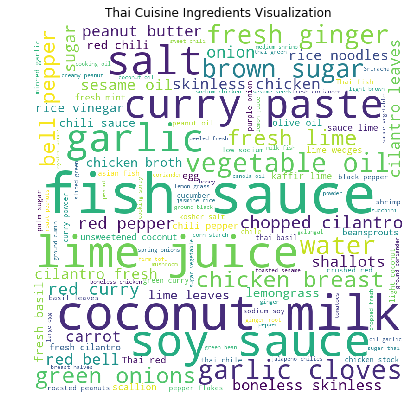

In [57]:
visualize_cuisine('thai')

In [58]:
# Notice Ingredients Trends in each cuisine to come up with feature